In [1]:
import pandas as pd

In [2]:
data_latih = pd.read_csv('./tfidf/result_latih_tfidf.csv', encoding='utf-8')
data_latih

,abdi,adaptasi,admin,aksen,akur,ala,alam,alih,analytics,aplikasi,...,ubah,udh,umur,usaha,via,win,ya,yg,zaman,label
0,0.000000,0.053834,0.137409,0.137409,0.137409,0.00000,0.000000,0.000000,0.000000,0.274818,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,POSITIF
1,0.000000,0.151162,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.265824,NEGATIF
2,0.000000,0.118030,0.000000,0.000000,0.000000,0.00000,0.000000,0.159495,0.173151,0.000000,...,0.00000,0.173151,0.000000,0.000000,0.000000,0.00000,0.173151,0.147450,0.000000,POSITIF
3,0.000000,0.151162,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.265824,NEGATIF
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.12002,0.000000,0.000000,0.000000,0.000000,...,0.12002,0.000000,0.000000,0.000000,0.000000,0.12002,0.000000,0.352452,0.000000,NEGATIF
5,0.000000,0.118030,0.000000,0.000000,0.000000,0.00000,0.000000,0.159495,0.173151,0.000000,...,0.00000,0.173151,0.000000,0.000000,0.000000,0.00000,0.173151,0.147450,0.000000,POSITIF
6,0.000000,0.151162,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.265824,NEGATIF
7,0.000000,0.118030,0.000000,0.000000,0.000000,0.00000,0.000000,0.159495,0.173151,0.000000,...,0.00000,0.173151,0.000000,0.000000,0.000000,0.00000,0.173151,0.147450,0.000000,POSITIF
8,0.000000,0.118030,0.000000,0.000000,0.000000,0.00000,0.000000,0.159495,0.173151,0.000000,...,0.00000,0.173151,0.000000,0.000000,0.000000,0.00000,0.173151,0.147450,0.000000,POSITIF
9,0.000000,0.118030,0.000000,0.000000,0.000000,0.00000,0.000000,0.159495,0.173151,0.000000,...,0.00000,0.173151,0.000000,0.000000,0.000000,0.00000,0.173151,0.147450,0.000000,POSITIF


In [3]:
data_uji = pd.read_csv('./tfidf/result_uji_tfidf.csv', encoding='utf-8')
data_uji

,abdi,adaptasi,admin,aksen,akur,ala,alam,alih,analytics,aplikasi,...,ubah,udh,umur,usaha,via,win,ya,yg,zaman,label
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.23126,0.000000,NEGATIF
1,0.0,0.237723,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.303388,0.0,0.0,0.0,0.000000,0.00000,0.000000,POSITIF
2,0.0,0.118030,0.0,0.0,0.0,0.0,0.0,0.159495,0.173151,0.0,...,0.0,0.173151,0.000000,0.0,0.0,0.0,0.173151,0.14745,0.000000,POSITIF
3,0.0,0.151162,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.265824,NEGATIF


### Oversampling

In [4]:
print("Sebelum Oversampling, jumlah label 'POSITIF': {}".format(sum(data_latih['label'] == 'POSITIF')))
print("Sebelum Oversampling, jumlah label 'NEGATIF': {} ".format(sum(data_latih['label'] == 'NEGATIF')))

Sebelum Oversampling, jumlah label 'POSITIF': 7
Sebelum Oversampling, jumlah label 'NEGATIF': 6 


#### SMOTE

In [5]:
# SMOTE
# !pip install imblearn

from imblearn.over_sampling import SMOTE

In [6]:

X = data_latih.drop('label', axis=1)
y = data_latih['label']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [7]:
print("Sebelum Oversampling, jumlah label 'POSITIF': {}".format(sum(y_res == 'POSITIF')))
print("Sebelum Oversampling, jumlah label 'NEGATIF': {} ".format(sum(y_res == 'NEGATIF')))

Sebelum Oversampling, jumlah label 'POSITIF': 7
Sebelum Oversampling, jumlah label 'NEGATIF': 7 


In [8]:
type(X_res)
type(y_res)

pandas.core.series.Series

In [9]:
print(X_res.shape)
print(y_res.shape)

(14, 183)
(14,)


### KNN Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier()

#### K-Fold Cross Validation

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

In [13]:
conf_matrices = []
class_reports = []

precisions = []
recalls = []
f1_scores = []
accuracies = []

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Dell 7300\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell 7300\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell 7300\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell 7300\anaconda3\lib\site-packages\sklearn\m

Fold 1:

Confusion Matrix:
 [[0 1]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

     NEGATIF       0.00      0.00      0.00         1
     POSITIF       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy:  0.5

----------------------



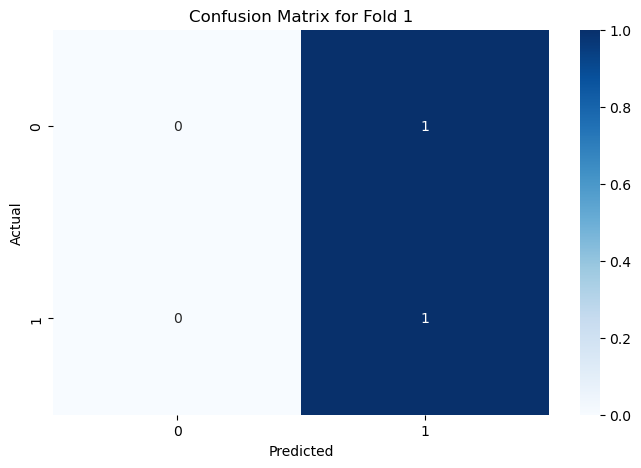

Fold 2:

Confusion Matrix:
 [[0 0]
 [1 1]]

Classification Report:
               precision    recall  f1-score   support

     NEGATIF       0.00      0.00      0.00         0
     POSITIF       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

Accuracy:  0.5

----------------------



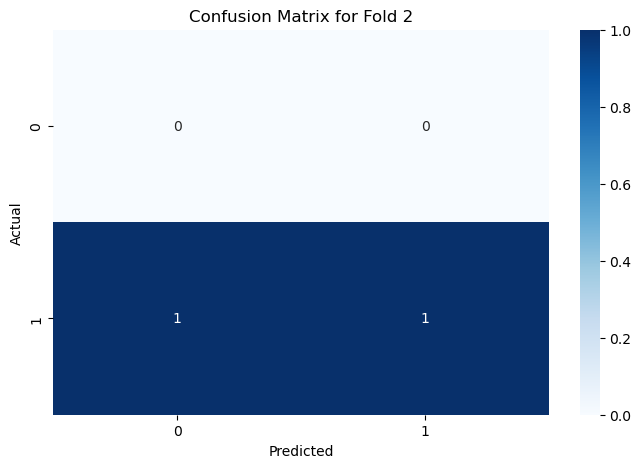

Fold 3:

Confusion Matrix:
 [[2]]

Classification Report:
               precision    recall  f1-score   support

     POSITIF       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy:  1.0

----------------------



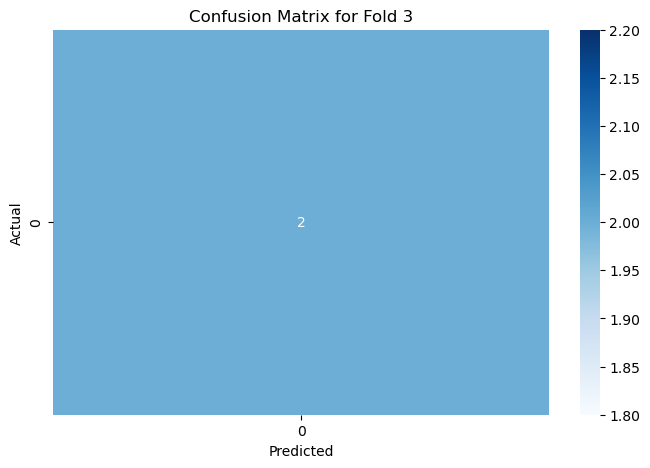

Fold 4:

Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

     NEGATIF       1.00      1.00      1.00         1
     POSITIF       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy:  1.0

----------------------



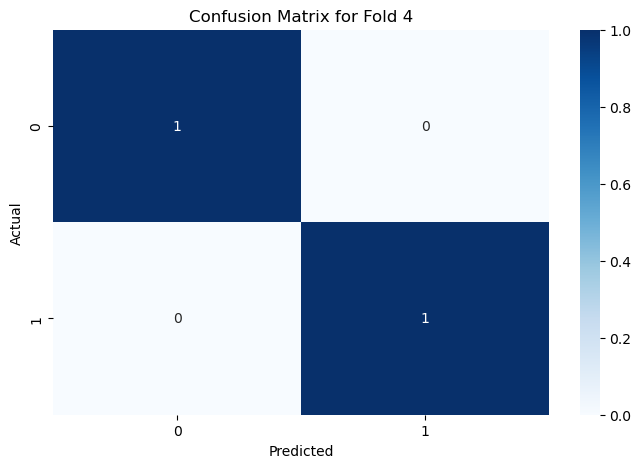

Fold 5:

Confusion Matrix:
 [[1]]

Classification Report:
               precision    recall  f1-score   support

     NEGATIF       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy:  1.0

----------------------



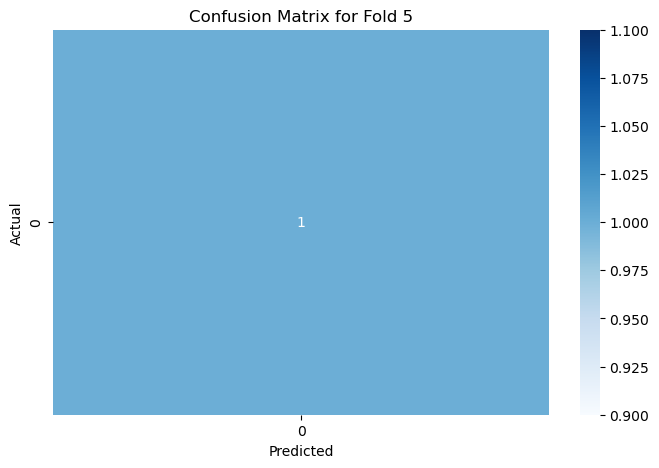

Fold 6:

Confusion Matrix:
 [[0 1]
 [0 0]]

Classification Report:
               precision    recall  f1-score   support

     NEGATIF       0.00      0.00      0.00       1.0
     POSITIF       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Accuracy:  0.0

----------------------



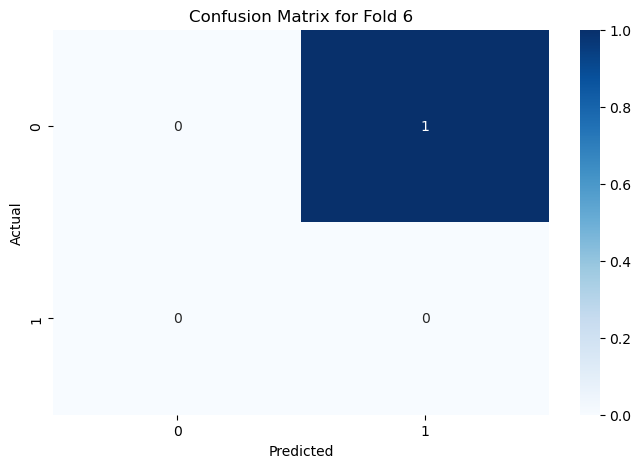

Fold 7:

Confusion Matrix:
 [[1]]

Classification Report:
               precision    recall  f1-score   support

     POSITIF       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy:  1.0

----------------------



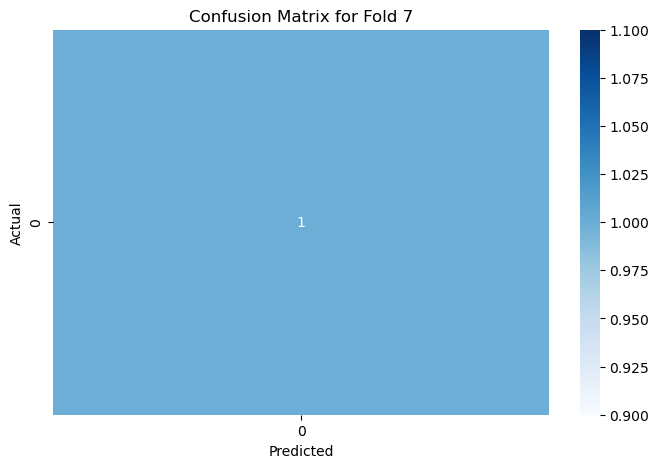

Fold 8:

Confusion Matrix:
 [[1]]

Classification Report:
               precision    recall  f1-score   support

     NEGATIF       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy:  1.0

----------------------



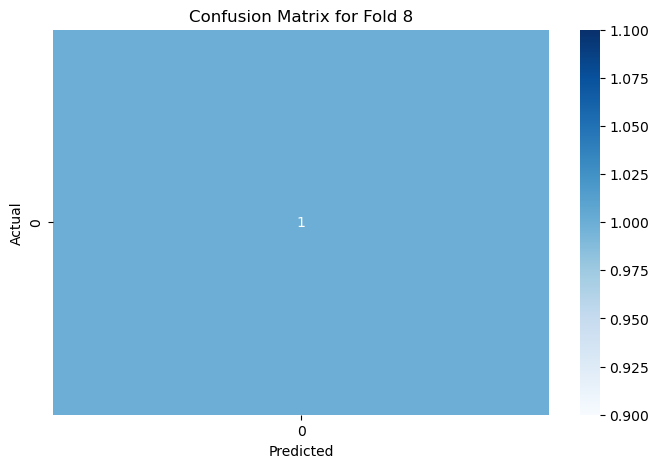

Fold 9:

Confusion Matrix:
 [[1]]

Classification Report:
               precision    recall  f1-score   support

     NEGATIF       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy:  1.0

----------------------



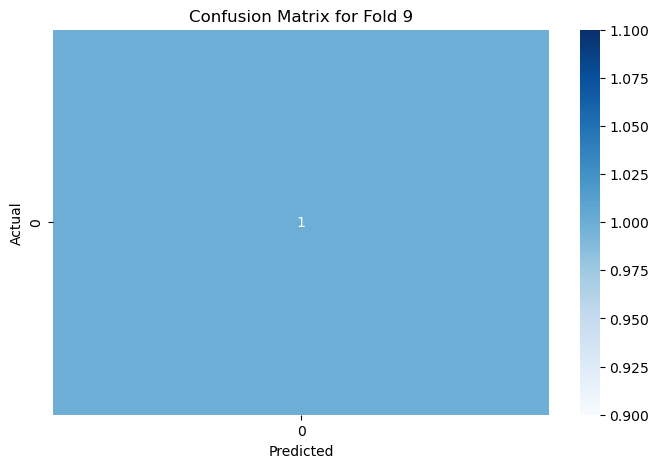

Fold 10:

Confusion Matrix:
 [[1]]

Classification Report:
               precision    recall  f1-score   support

     NEGATIF       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy:  1.0

----------------------



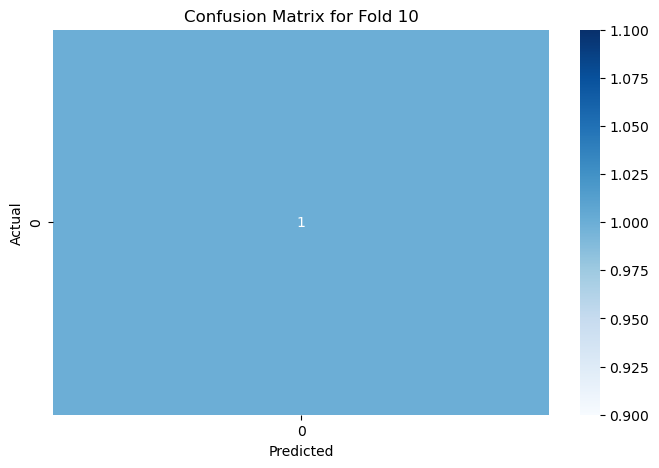

In [15]:
kFold = KFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in kFold.split(X_res):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    accuracies.append(accuracy_score(y_test, y_pred))  
    
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))

for i, (conf_matrix, class_report) in enumerate(zip(conf_matrices, class_reports)):
    print(f"Fold {i+1}:\n")
    print("Confusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("Accuracy: ", accuracies[i]) 
    print("\n----------------------\n")

    plt.figure(figsize=(8,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {i+1}')
    plt.show()

In [16]:
import numpy as np

total_conf_matrix = np.zeros((2, 2))

for conf_matrix in conf_matrices:
    total_conf_matrix += conf_matrix

avg_conf_matrix = total_conf_matrix / len(conf_matrices)

print("Rata-Rata Confusion Matrix:\n", avg_conf_matrix)

Rata-Rata Confusion Matrix:
 [[0.8 0.9]
 [0.8 1. ]]


In [17]:
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)
avg_accuracy = np.mean(accuracies)

print("Rata-Rata Precision: ", avg_precision)
print("Rata-Rata Recall: ", avg_recall)
print("Rata-Rata F1-Score: ", avg_f1_score)
print("Rata-Rata Accuracy: ", avg_accuracy)

Rata-Rata Precision:  0.775
Rata-Rata Recall:  0.775
Rata-Rata F1-Score:  0.7666666666666666
Rata-Rata Accuracy:  0.8


In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

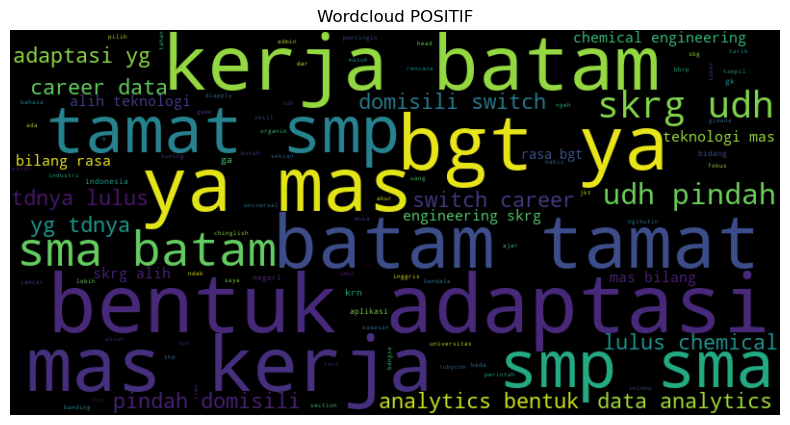

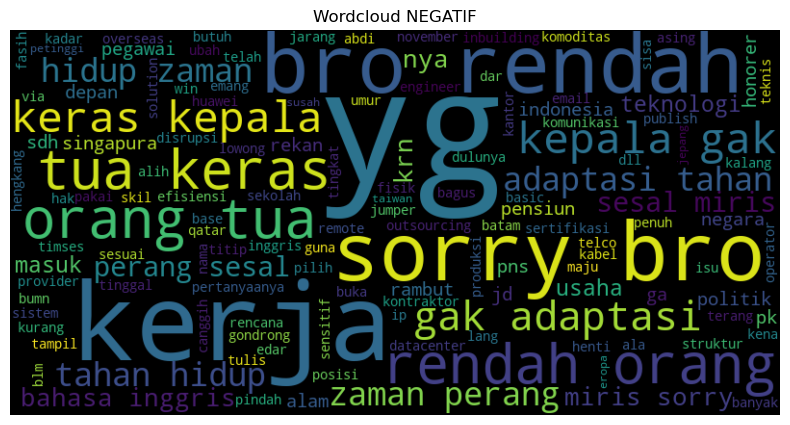

In [22]:
dataCleaning = pd.read_csv('./output/data-clean-ind-test.csv')

positive_text = ' '.join(dataCleaning[dataCleaning[' label '] == 'POSITIF']['resultStemming'])
negative_text = ' '.join(dataCleaning[dataCleaning[' label '] == 'NEGATIF']['resultStemming'])

# Hapus tanda '
positive_text = positive_text.replace("'", "")
negative_text = negative_text.replace("'", "")

positive_wordcloud = WordCloud(width=800, height=400).generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Wordcloud POSITIF')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Wordcloud NEGATIF')
plt.axis('off')
plt.show()
